# Feature Engineering for Strawberry Price Prediction

This notebook demonstrates the feature engineering process for predicting strawberry prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from src.fct_eda import *
from src.fct_feature_eng import *
from src.parameter import get_dict_params

## 1. Load and Split Data

In [2]:
# Load data
df = pd.read_csv('data/raw/senior_ds_test.csv')

# Load parameters
dict_params = get_dict_params()
weather_cols = dict_params['weather_cols']

# Split data
train_df, test_df = split_train_test(df)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (443, 15)
Testing set shape: (78, 15)


## 2. Test Different Interpolation Methods

In [3]:
# Test different interpolation methods
interpolation_methods = ['mean', 'rolling']
interpolated_data = {}

for method in interpolation_methods:
    # Create a copy of the data
    train_copy = train_df.copy()
    
    # Apply interpolation to each weather column
    for col in weather_cols:
        if col != 'price':
            train_copy[col] = interpolate_missing_values(train_copy[col], method=method)
    
    interpolated_data[method] = train_copy
    
    # Print statistics
    print(f"\nInterpolation method: {method}")
    for col in weather_cols:
        if col != 'price':
            print(f"{col} missing values: {train_copy[col].isna().sum()}")


Interpolation method: mean
windspeed missing values: 0
temp missing values: 0
cloudcover missing values: 0
precip missing values: 0
solarradiation missing values: 0

Interpolation method: rolling
windspeed missing values: 0
temp missing values: 0
cloudcover missing values: 0
precip missing values: 0
solarradiation missing values: 0


## 3. Compare Interpolation Results

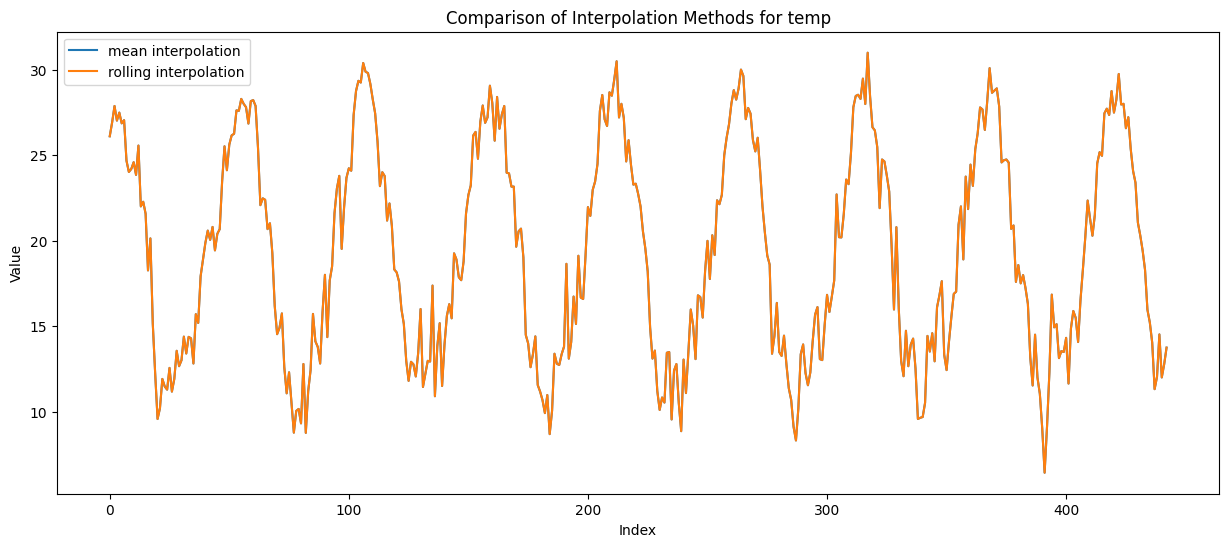

In [4]:
# Plot comparison for a sample column
sample_col = 'temp'
plt.figure(figsize=(15, 6))

for method in interpolation_methods:
    plt.plot(interpolated_data[method][sample_col], label=f'{method} interpolation')

plt.title(f'Comparison of Interpolation Methods for {sample_col}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## 4. Feature Engineering Process

In [5]:
# Process training data
train_processed = preprocessing(train_df, is_training=True)

# Process test data
test_processed = preprocessing(test_df, is_training=False)

/home/briacleguillou/Documents/machine_learning/strawberries_price_prediction/src/fct_feature_eng.py:141: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['price_momentum'] = df['price'].pct_change()
/home/briacleguillou/Documents/machine_learning/strawberries_price_prediction/src/fct_feature_eng.py:141: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['price_momentum'] = df['price'].pct_change()


In [6]:
# Scale features
train_scaled = scale_df(train_processed)
test_scaled = scale_df(test_processed)

In [7]:
# Display date ranges
print("\nTraining data date range:")
print(f"Start: {train_processed['start_date'].min()}, End: {train_processed['start_date'].max()}")
print("\nTesting data date range:")
print(f"Start: {test_processed['start_date'].min()}, End: {test_processed['start_date'].max()}")


Training data date range:
Start: 2013-11-04 00:00:00, End: 2021-12-27 00:00:00

Testing data date range:
Start: 2022-01-03 00:00:00, End: 2023-05-29 00:00:00


## 5. Analyze Generated Features

In [8]:
# Display feature categories
print("Temporal Features:")
temporal_cols = [col for col in train_processed.columns if any(x in col for x in ['year', 'month', 'week', 'season'])]
print(temporal_cols)

print("\nWeather Features:")
weather_cols2 = [col for col in train_processed.columns if any(x in col for x in weather_cols)]
print(weather_cols2)

print("\nPrice Features:")
price_cols = [col for col in train_processed.columns if 'price' in col]
print(price_cols)

Temporal Features:
['year', 'week', 'month', 'season', 'month_sin', 'month_cos', 'week_sin', 'week_cos', 'price_rel_seasonal', 'season_Winter', 'season_Spring', 'season_Summer', 'season_Fall']

Weather Features:
['windspeed', 'temp', 'cloudcover', 'precip', 'solarradiation', 'price_min', 'price_max', 'price', 'temp_precip', 'windspeed_lag1', 'windspeed_lag2', 'windspeed_lag4', 'windspeed_rolling_mean_4w', 'windspeed_rolling_std_4w', 'windspeed_rolling_max_4w', 'windspeed_rolling_min_4w', 'windspeed_trend', 'temp_lag1', 'temp_lag2', 'temp_lag4', 'temp_rolling_mean_4w', 'temp_rolling_std_4w', 'temp_rolling_max_4w', 'temp_rolling_min_4w', 'temp_trend', 'cloudcover_lag1', 'cloudcover_lag2', 'cloudcover_lag4', 'cloudcover_rolling_mean_4w', 'cloudcover_rolling_std_4w', 'cloudcover_rolling_max_4w', 'cloudcover_rolling_min_4w', 'cloudcover_trend', 'precip_lag1', 'precip_lag2', 'precip_lag4', 'precip_rolling_mean_4w', 'precip_rolling_std_4w', 'precip_rolling_max_4w', 'precip_rolling_min_4w', 'p

## 6. Feature Importance Analysis

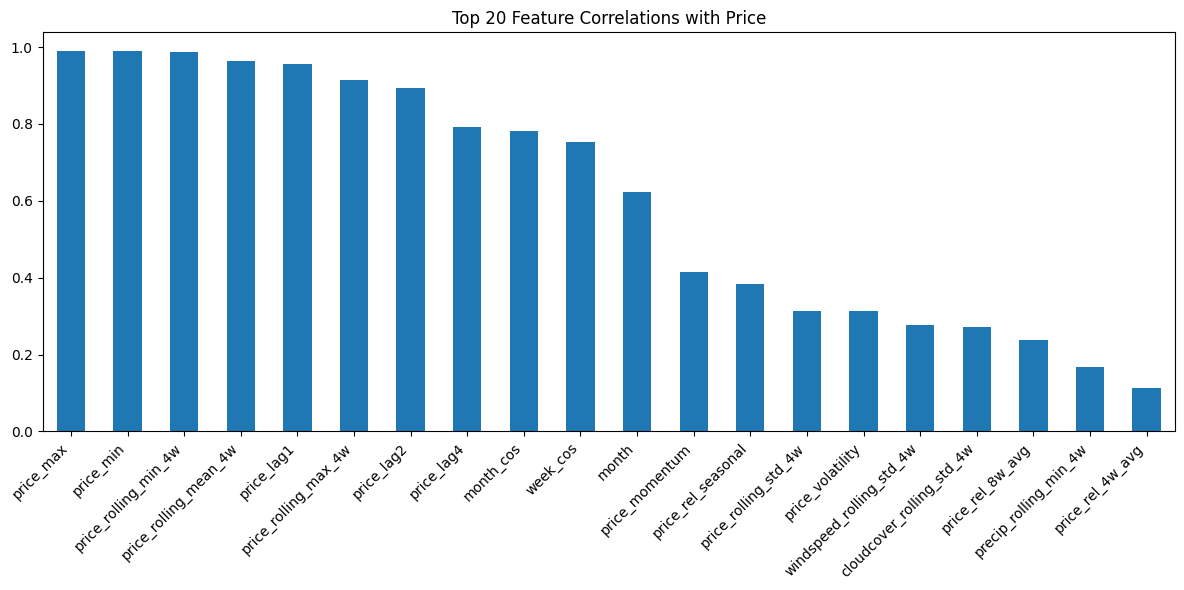

In [9]:
# Calculate correlations with price
correlations = train_processed.select_dtypes(include='float').corr()['price'].sort_values(ascending=False)

# Plot top 20 correlations
plt.figure(figsize=(12, 6))
correlations[1:21].plot(kind='bar')
plt.title('Top 20 Feature Correlations with Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Export Results

In [10]:
train_scaled.to_csv('data/processed/train_scaled.csv')
train_processed.to_csv('data/processed/train_processed.csv')
test_scaled.to_csv('data/processed/test_scaled.csv')
test_processed.to_csv('data/processed/test_processed.csv')

## 8. Key Findings and Next Steps

1. Interpolation Methods:
   - Mean interpolation provides a simple baseline
   - Rolling interpolation captures local trends better

2. Temporal Patterns:
   - Strong seasonal effects captured through cyclical encoding
   - Weekly patterns important for short-term predictions

3. Weather Impacts:
   - Temperature and solar radiation show significant correlations
   - Weather interactions provide additional insights

4. Price Dynamics:
   - Price momentum and volatility capture market behavior
   - Relative price features help normalize across seasons

5. Feature Importance:
   - Seasonal indicators among top predictors
   - Weather features show varying importance

Next Steps:
1. Feature selection based on correlation analysis
2. Consider polynomial features for weather interactions
3. Experiment with different lag windows
4. Validate feature importance with model-based methods